In [50]:
import os
import matplotlib.pyplot as plt
import numpy as np
import librosa
import soundfile as sf
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
# MEngambil setiap audio path beserta labelnya
DATASET_PATH = "genres_original"

label = []
audio_paths = []
audio_label = []

for i,fol in enumerate(os.listdir(DATASET_PATH)):
    if fol not in label:
        label.append(fol) #Mencari tahu label apa saja yang ada
    for file in os.listdir(DATASET_PATH + "/" + fol):
        audio_paths.append(DATASET_PATH + "/" + fol + "/" + file) #memasukkan audiopath ke list audio_path
        audio_label.append(i) #memasukkan label ke audio_label

In [4]:
# menghasilkan mfcc dari data audio
def get_mfcc(audio, sr):
    mfcc = np.array(librosa.feature.mfcc(y=audio, sr=sr))
    return mfcc

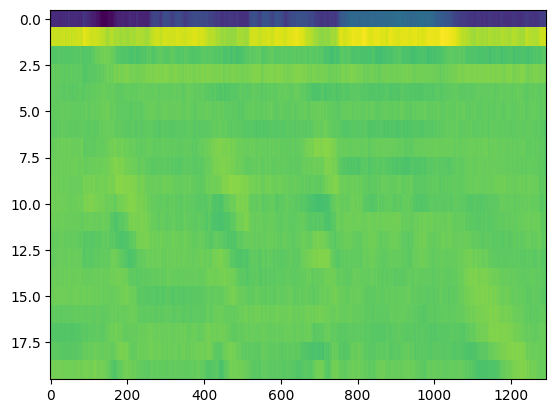

In [5]:
# menampilkan mfcc dari audio classical.00015.wav
example_file = f"{DATASET_PATH}/classical/classical.00015.wav"
audio, sr = sf.read(example_file)
mfcc = get_mfcc(audio, sr)
plt.imshow(mfcc, interpolation='nearest', aspect='auto')
plt.show()

In [6]:
# menghasilkan chroma stft dari data audio

def get_chroma(audio, sr):
    chroma = np.array(librosa.feature.chroma_stft(y=audio, sr=sr))
    return chroma

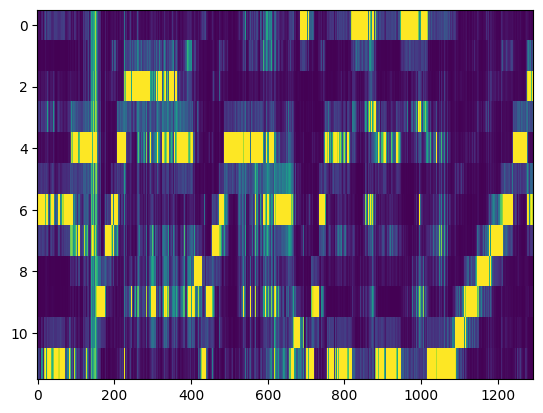

In [7]:
# menampilkan chroma stft dari audio classical.00015.wav

example_file = f"{DATASET_PATH}/classical/classical.00015.wav"
audio, sr = sf.read(example_file)
chroma = get_chroma(audio, sr)
plt.imshow(chroma, interpolation='nearest', aspect='auto')
plt.show()

In [8]:
# menghasilkan melspectogram dari data audio

def get_melspectrogram(audio, sr):
    melspectrogram = np.array(librosa.feature.melspectrogram(y=audio, sr=sr))
    return melspectrogram

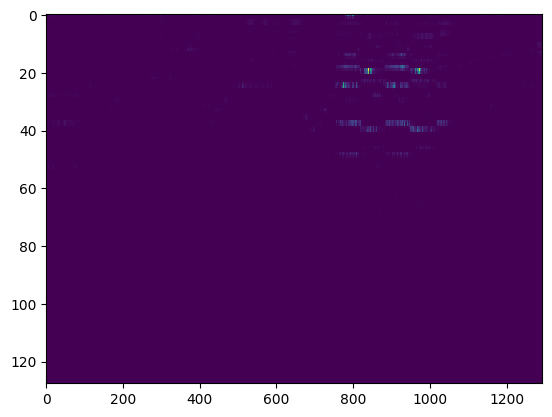

In [9]:
# menampilkan melspectogram dari audio classical.00015.wav

example_file = f"{DATASET_PATH}/classical/classical.00015.wav"
audio, sr = sf.read(example_file)
melspec = get_melspectrogram(audio, sr)
plt.imshow(melspec, interpolation="nearest", aspect="auto")
plt.show()

In [10]:
# menghasilkan spectral centroid dari data audio

def get_spectral_centroid(audio, sr):
    spectral_centroid = np.array(librosa.feature.spectral_centroid(y=audio, sr=sr))
    return spectral_centroid

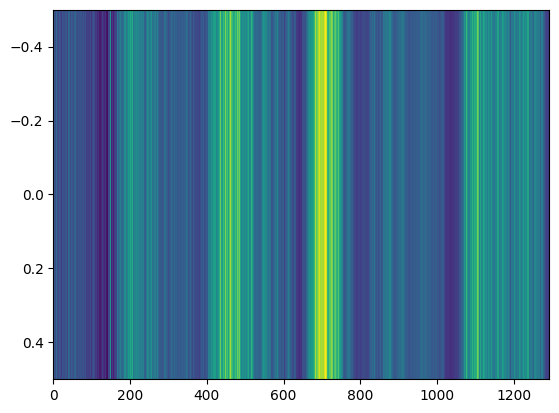

In [11]:
# menampilkan spectral centroid dari audio classical.00015.wav

example_file = f"{DATASET_PATH}/classical/classical.00015.wav"
audio, sr = sf.read(example_file)
spectral_centroid = get_spectral_centroid(audio, sr)
plt.imshow(spectral_centroid, interpolation="nearest", aspect="auto")
plt.show()

In [12]:
# menghasilkan tonnetz dari data audio

def get_tonnetz(audio, sr):
    tonnetz = np.array(librosa.feature.tonnetz(y=audio, sr=sr))
    return tonnetz

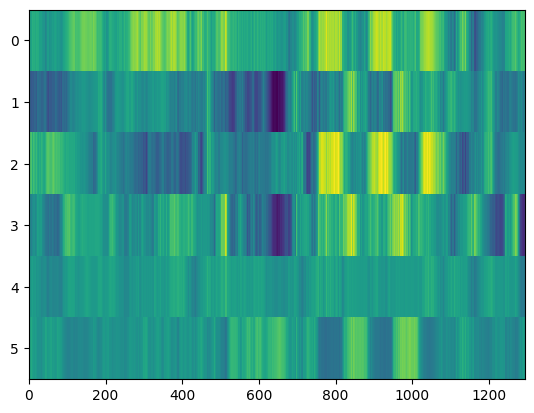

In [13]:
# menampilkan tonnetz dari audio classical.00015.wav

example_file = f"{DATASET_PATH}/classical/classical.00015.wav"
audio, sr = sf.read(example_file)
tonnetz = get_tonnetz(audio, sr)
plt.imshow(tonnetz, interpolation="nearest", aspect="auto")
plt.show()

In [14]:
# menghasilkan delta dari data audio

def get_delta(audio, sr):
    mfcc = get_mfcc(audio, sr)
    delta = np.array(librosa.feature.delta(data=mfcc))
    return delta

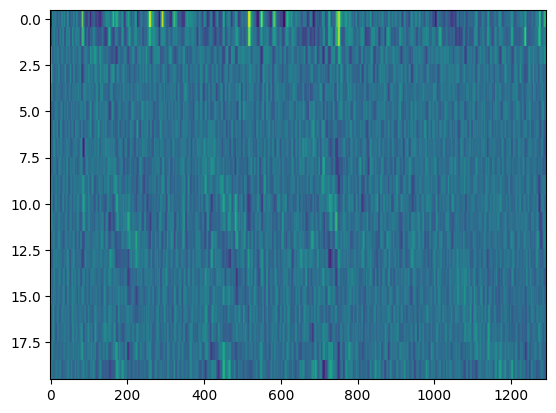

In [15]:
# menampilkan delta dari audio classical.00015.wav

example_file = f"{DATASET_PATH}/classical/classical.00015.wav"
audio, sr = sf.read(example_file)
delta = get_delta(audio, sr)
plt.imshow(delta, interpolation="nearest", aspect="auto")
plt.show()

In [16]:
# Mengambil setiap fitur dari function yang telah kita buat diatas tadi, lalu mencari min, max dan mean dari stiap fitur. Kemudian disatukan kedalam satu list
def get_feature(audio_path):
    audio, _ = sf.read(audio_path) #membaca audio path menjadi data audio
    
    mfcc_list = []
    mfcc = get_mfcc(audio, 16000) #mengambil mfcc dari audio
    mfcc_list.append(mfcc.min(axis=1)) #mencari min dari mfcc audio
    mfcc_list.append(mfcc.max(axis=1)) #mencari max dari mfcc audio
    mfcc_list.append(mfcc.mean(axis=1)) #mencari mead dari mfcc audio
    mfcc_feature = np.concatenate(mfcc_list)
    
    chroma_list = []
    chroma = get_chroma(audio, 16000)#mengambil chroma stft dari audio
    chroma_list.append(chroma.min(axis=1)) #mencari min dari chroma stft audio
    chroma_list.append(chroma.max(axis=1))  #mencari max dari chroma stft audio
    chroma_list.append(chroma.mean(axis=1)) #mencari mean dari chroma stft audio
    chroma_feature = np.concatenate(chroma_list)
    
    melspec_list = []
    melspec = get_melspectrogram(audio, 16000) #mengambil melspectrogram dari audio
    melspec_list.append(melspec.min(axis=1)) #mencari min dari melspectrogram audio
    melspec_list.append(melspec.max(axis=1)) #mencari max dari melspectrogram audio
    melspec_list.append(melspec.mean(axis=1)) #mencari mean dari melspectrogram audio
    melspec_feature = np.concatenate(melspec_list)
    
    spectral_centroid_list = []
    spectral_centroid = get_spectral_centroid(audio, 16000) #mengambil spectral centroid dari audio
    spectral_centroid_list.append(spectral_centroid.min(axis=1)) #mencari min dari spectral centroid audio
    spectral_centroid_list.append(spectral_centroid.max(axis=1)) #mencari max dari spectral centroid audio
    spectral_centroid_list.append(spectral_centroid.mean(axis=1)) #mencari mean dari spectral centroid audio
    spectral_centroid_feature = np.concatenate(spectral_centroid_list)
    
    tonnetz_list = []
    tonnetz = get_tonnetz(audio, 16000) #mengambil tonnetz dari audio
    tonnetz_list.append(tonnetz.min(axis=1)) #mencari min dari tonnetz audio
    tonnetz_list.append(tonnetz.max(axis=1)) #mencari max dari tonnetz audio
    tonnetz_list.append(tonnetz.mean(axis=1)) #mencari mean dari tonnetz audio
    tonnetz_feature = np.concatenate(tonnetz_list)
    
    delta_list = []
    delta = get_delta(audio, 16000) #mengambil delta dari audio
    delta_list.append(delta.min(axis=1)) #mencari min dari delta audio
    delta_list.append(delta.max(axis=1)) #mencari max dari delta audio
    delta_list.append(delta.mean(axis=1)) #mencari mean dari delta audio
    delta_feature = np.concatenate(delta_list)

    return np.concatenate((mfcc_feature, chroma_feature, melspec_feature, spectral_centroid_feature, tonnetz_feature, delta_feature))

    

In [17]:
# List fitur yang akan kita gunakan untuk melatih model dari audio classical.00015.wav

example_file = f"{DATASET_PATH}/classical/classical.00015.wav"
get_feature(example_file).tolist()

[-609.6978572890114,
 52.62447530199264,
 -48.242729363037675,
 -45.59212266299444,
 -29.754497219941022,
 -14.822483211543767,
 -33.272621694826256,
 -12.118485750287455,
 -30.881829496342114,
 -19.683261482984648,
 -26.75886743335733,
 -29.58879816318845,
 -42.8486717124068,
 -33.92905833752386,
 -34.90250866899225,
 -23.35384186008067,
 -24.255305277825542,
 -24.763194772180967,
 -19.120517384824105,
 -27.37409417969305,
 -317.6749419940041,
 195.26726287906462,
 34.76133169467602,
 52.209636722089606,
 22.740100519142118,
 21.438790897849536,
 13.73224546091691,
 23.73740705600013,
 27.529937444086205,
 64.12997547554062,
 55.14961562489858,
 54.33938062901673,
 62.49129189706176,
 43.59133491920794,
 36.81447852100517,
 36.324678432002365,
 24.639480287784757,
 52.29233150262077,
 65.07169685665046,
 55.28186948855348,
 -447.9540841058905,
 127.31050551541182,
 -14.290816576329398,
 28.919564311485477,
 -0.2639383292272797,
 5.196854658974303,
 -10.628088553052384,
 3.599892048337

In [18]:
# mencari semua fitur dari setiap audiopath yang kita punya
features = []
for i in audio_paths:
    features.append(get_feature(i))

In [51]:
#mengubah fitur dan label menjadi np array

features = np.array(features) 
labels = np.array(audio_label)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [52]:
#Mensadarisasi menggunakan StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
# Mentrain training data kedalam RandomForestClassifier
clf = RandomForestClassifier(n_estimators=180, criterion= "log_loss", warm_start=True, random_state=1)
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=180, random_state=1,
                       warm_start=True)

In [54]:
# Menampilkan metrics testing data dari RandomForestClassifier
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.76
[[16  0  1  0  0  0  3  0  1  0]
 [ 0 12  0  0  0  0  0  0  0  0]
 [ 3  0 18  1  0  1  1  0  0  0]
 [ 1  0  0 14  3  0  0  0  2  2]
 [ 0  0  0  0 12  0  1  1  1  0]
 [ 0  2  0  0  0 24  1  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  2  0  0  0  0 16  1  0]
 [ 0  0  3  1  2  0  1  1 14  0]
 [ 0  0  1  3  2  2  1  1  2  8]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        21
           1       0.86      1.00      0.92        12
           2       0.72      0.75      0.73        24
           3       0.74      0.64      0.68        22
           4       0.63      0.80      0.71        15
           5       0.89      0.89      0.89        27
           6       0.69      1.00      0.82        18
           7       0.84      0.84      0.84        19
           8       0.67      0.64      0.65        22
           9       0.80      0.40      0.53        20

    accuracy                           0.76       200
   macro avg  

In [55]:
# Menampilkan metrics training data dari RandomForestClassifier

y_pred = clf.predict(X_train)
print(accuracy_score(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

1.0
[[79  0  0  0  0  0  0  0  0  0]
 [ 0 88  0  0  0  0  0  0  0  0]
 [ 0  0 76  0  0  0  0  0  0  0]
 [ 0  0  0 78  0  0  0  0  0  0]
 [ 0  0  0  0 85  0  0  0  0  0]
 [ 0  0  0  0  0 72  0  0  0  0]
 [ 0  0  0  0  0  0 82  0  0  0]
 [ 0  0  0  0  0  0  0 81  0  0]
 [ 0  0  0  0  0  0  0  0 78  0]
 [ 0  0  0  0  0  0  0  0  0 80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        88
           2       1.00      1.00      1.00        76
           3       1.00      1.00      1.00        78
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        72
           6       1.00      1.00      1.00        82
           7       1.00      1.00      1.00        81
           8       1.00      1.00      1.00        78
           9       1.00      1.00      1.00        80

    accuracy                           1.00       799
   macro avg   

In [67]:
# Mentrain training data kedalam RandomForestClassifier

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [68]:
# Menampilkan metrix testing data dari MultinomialNB

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.45
[[14  2  0  0  1  1  1  0  2  0]
 [ 0 12  0  0  0  0  0  0  0  0]
 [ 9  1  1  0  1  8  1  1  1  1]
 [ 3  0  1 10  1  1  0  1  4  1]
 [ 1  0  1  1  6  0  1  2  3  0]
 [ 2 16  0  0  0  8  0  1  0  0]
 [ 0  0  0  3  0  0 13  0  2  0]
 [ 0  0  0  0  1  2  0 12  4  0]
 [ 1  0  0  1  0  8  0  0 12  0]
 [ 3  1  2  3  0  3  2  0  4  2]]
              precision    recall  f1-score   support

           0       0.42      0.67      0.52        21
           1       0.38      1.00      0.55        12
           2       0.20      0.04      0.07        24
           3       0.56      0.45      0.50        22
           4       0.60      0.40      0.48        15
           5       0.26      0.30      0.28        27
           6       0.72      0.72      0.72        18
           7       0.71      0.63      0.67        19
           8       0.38      0.55      0.44        22
           9       0.50      0.10      0.17        20

    accuracy                           0.45       200
   macro avg  

In [69]:
# Menampilkan metrix training data dari MultinomialNB

y_pred = clf.predict(X_train)
print(accuracy_score(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

0.5106382978723404
[[56  1  1  1  0 12  3  0  5  0]
 [ 1 83  0  0  0  3  0  0  0  1]
 [11 11 12  3  2 29  0  1  5  2]
 [ 8  3  2 37  1 13  0  3  8  3]
 [ 8  1  1  2 22  5  1  8 36  1]
 [ 0 33  0  2  0 31  0  0  2  4]
 [ 4  0  1  3  0  7 49  0 11  7]
 [ 0  1  3  4  2  2  0 54 12  3]
 [ 3  5  2  0  2 21  0  3 42  0]
 [11  3  3 10  2 18  3  0  8 22]]
              precision    recall  f1-score   support

           0       0.55      0.71      0.62        79
           1       0.59      0.94      0.72        88
           2       0.48      0.16      0.24        76
           3       0.60      0.47      0.53        78
           4       0.71      0.26      0.38        85
           5       0.22      0.43      0.29        72
           6       0.88      0.60      0.71        82
           7       0.78      0.67      0.72        81
           8       0.33      0.54      0.41        78
           9       0.51      0.28      0.36        80

    accuracy                           0.51       799
